# b-Tag Discriminants

So I'm going to try to implement this in Beojean's code in C++, but first I just wanted to just plot the discriminants and the efficiencies from the [CDI](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/BTaggingBenchmarksRelease21) for my (privately produces) signal sample that I plotted in the Inital studies notebook. This is really just a sanity check to make sure that the values are reasonable, and gain some intuition for the problem (because before I've been looking at the low-level discriminant for rnnip on ttbar)!


In [1]:
from root_numpy import root2array 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from __future__ import division


Welcome to JupyROOT 6.14/04


Now I'm running over the mini Ntuple, so there are different Ntuples than the variables that Beojean was producing.

In [2]:
fDir = "../../XhhCommon/run/XhhCommon-DAOD_EXOT8.14255149._000001.pool.root-topo-21.2.49.TestProd.0/data-MiniNTuple/"
fName = "mc16_13TeV.301490.MadGraphPythia8EvtGen_A14NNPDF23LO_RS_G_hh_bbbb_c10_M500.deriv.DAOD_EXOT8.e3820_s3126_r9364_p3554.root"
treeName = "XhhMiniNtuple"
m500_file = root2array(fDir + fName, treeName)

/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc8-opt/lib/python3.6/site-packages/root_numpy/_tree.py:239: RootNumpyUnconvertibleWarning: cannot convert leaf 'jet_ak2track_asso_sys' of branch 'jet_ak2track_asso_sys' with type 'vector<vector<vector<float> > >' (skipping)
  warn_missing_tree)


In [3]:
df = pd.DataFrame(m500_file)

In [4]:
df.head()

runNumber  eventNumber  lumiBlock  coreFlags  bcid  mcEventNumber  \
0     284500          844         30          0  1054            844   
1     284500          423         20          0    60            423   
2     284500          362         26          0  1345            362   
3     284500         1378         13          0   421           1378   
4     284500         1306         20          0  2735           1306   

   mcChannelNumber  mcEventWeight  NPV  actualInteractionsPerCrossing  \
0           301490            1.0   15                           29.5   
1           301490            1.0   13                           19.5   
2           301490            1.0   17                           25.5   
3           301490            1.0    6                           12.5   
4           301490            1.0   11                           19.5   

     ...      truth_hcand_boosted_pt  truth_hcand_boosted_eta  \
0    ...                          []                       []   
1    ...                          []                       []   
2    ...                          []                       []   
3    ...                          []                       []   
4    ...                          []                       []   

   truth_hcand_boosted_phi  truth_hcand_boosted_m  truth_hcand_boosted_c2  \
0                       []                     []                      []   
1                       []                     []                      []   
2                       []                     []                      []   
3                       []                     []                      []   
4                       []                     []                      []   

  truth_hcand_boosted_d2 passedEmulatedTriggers   weight weight_xs cleanEvent  
0                     []                     []  0.89149   0.89149        1.0  
1                     []                     []  0.89149   0.89149        1.0  
2                     []                     []  0.89149   0.89149        1.0  
3                     []                     []  0.89149   0.89149        1.0  
4                     []                     []  0.89149   0.89149        1.0  

[5 rows x 230 columns]

In [5]:
for c in df.columns:
    if ('MV2' in c) or ('DL1' in c):
        print c

resolvedJets_MV2c00
resolvedJets_MV2c10
resolvedJets_MV2c10mu
resolvedJets_MV2c10rnn
resolvedJets_MV2c20
resolvedJets_MV2c100
resolvedJets_DL1
resolvedJets_DL1_pu
resolvedJets_DL1_pc
resolvedJets_DL1_pb
resolvedJets_DL1mu
resolvedJets_DL1mu_pu
resolvedJets_DL1mu_pc
resolvedJets_DL1mu_pb
resolvedJets_DL1rnn
resolvedJets_DL1rnn_pu
resolvedJets_DL1rnn_pc
resolvedJets_DL1rnn_pb
resolvedJets_is_DL1_FixedCutBEff_70
resolvedJets_SF_DL1_FixedCutBEff_70
resolvedJets_is_MV2c10_FixedCutBEff_70
resolvedJets_SF_MV2c10_FixedCutBEff_70
jet_ak2track_asso_MV2c00
jet_ak2track_asso_MV2c10
jet_ak2track_asso_MV2c20
jet_ak2track_asso_MV2c100


Ok, what I care about it the discriminants for the various algorithms. Based on the list above, these are
- resolvedJets_MV2c10
- resolvedJets_MV2c10mu
- resolvedJets_MV2c10rnn

- resolvedJets_DL1
- resolvedJets_DL1mu
- resolvedJets_DL1rnn

*Question: What's the difference between the `mu` and `rnn` algs?* 

In [24]:
# Save the discriminant cut values as a dictionary of disctionaries
# where the first key referrs to the alg, and the second is the WP.

Db_cuts = {
    'MV2c10'    : {60 : 0.94,
                   70 : 0.83,
                   77 : 0.64,
                   85 : 0.11},
    'MV2c10mu'  : {60 : 0.95,
                   70 : 0.87,
                   77 : 0.71,
                   85 : 0.23},
    'MV2c10rnn' : {60 : 0.96,
                   70 : 0.87,
                   77 : 0.71,
                   85 : 0.26},
    
    'DL1'   : {60 : 2.74,
               70 : 2.02,
               77 : 1.45,
               85 : 0.46},
    'DL1mu' : {60 : 2.72,
               70 : 1.83,
               77 : 1.10,
               85 : 0.12},
    'DL1rnn': {60 : 4.31,
               70 : 2.98,
               77 : 2.23,
               85 : 1.32}
}


Sanity check: Check the efficiencies for jets passing these WPs. Is there any way to get the truth label info for these jets?

Yes! I have access to the HadronConeExclTruthLabelID :-)


In [7]:
df.resolvedJets_HadronConeExclTruthLabelID

0                 [5, 5, 5, 0, 5]
1                 [5, 5, 0, 0, 5]
2                    [5, 5, 0, 5]
3              [5, 5, 5, 5, 5, 0]
4                 [5, 5, 5, 5, 0]
5                    [5, 5, 5, 5]
6                    [5, 5, 5, 0]
7           [0, 5, 5, 4, 5, 5, 0]
8                    [5, 5, 0, 5]
9              [5, 5, 5, 0, 5, 0]
10                   [5, 5, 5, 0]
11             [5, 0, 5, 0, 4, 5]
12                [0, 5, 5, 5, 0]
13          [5, 5, 5, 0, 0, 0, 5]
14       [5, 5, 5, 0, 5, 0, 5, 5]
15                   [5, 5, 5, 5]
16                   [5, 5, 5, 0]
17             [5, 0, 5, 5, 0, 5]
18                   [5, 5, 5, 5]
19                [5, 0, 5, 4, 5]
20                [5, 5, 5, 0, 0]
21                   [5, 5, 5, 4]
22                   [5, 5, 5, 5]
23                   [5, 5, 5, 0]
24             [0, 5, 5, 0, 5, 0]
25                   [5, 5, 5, 0]
26                [5, 5, 5, 5, 0]
27                   [5, 0, 5, 5]
28                   [5, 5, 5, 5]
29            

Since the df is now at the jet level, I need to flatten it to get access to the track information. 

Use Michela's flatten function, which I have in my Emerging Jets folder.

In [8]:
import sys
sys.path.append("../../EmergingJetsAnalysis/")
from dataHandling import flatten

In [9]:
resolvedCols = [b for b in df.columns if 'resolvedJets' in b]

In [10]:
resolvedCols

['nresolvedJets',
 'resolvedJets_E',
 'resolvedJets_pt',
 'resolvedJets_phi',
 'resolvedJets_eta',
 'resolvedJets_NumTrkPt1000PV',
 'resolvedJets_SumPtTrkPt1000PV',
 'resolvedJets_TrackWidthPt1000PV',
 'resolvedJets_NumTrkPt500PV',
 'resolvedJets_SumPtTrkPt500PV',
 'resolvedJets_TrackWidthPt500PV',
 'resolvedJets_JVFPV',
 'resolvedJets_JvtJvfcorr',
 'resolvedJets_JvtRpt',
 'resolvedJets_Jvt',
 'resolvedJets_JvtPass_Loose',
 'resolvedJets_JvtEff_SF_Loose',
 'resolvedJets_JvtPass_Medium',
 'resolvedJets_JvtEff_SF_Medium',
 'resolvedJets_JvtPass_Tight',
 'resolvedJets_JvtEff_SF_Tight',
 'resolvedJets_fJvtPass_Medium',
 'resolvedJets_fJvtEff_SF_Medium',
 'resolvedJets_fJvtPass_Tight',
 'resolvedJets_fJvtEff_SF_Tight',
 'resolvedJets_MV2c00',
 'resolvedJets_MV2c10',
 'resolvedJets_MV2c10mu',
 'resolvedJets_MV2c10rnn',
 'resolvedJets_MV2c20',
 'resolvedJets_MV2c100',
 'resolvedJets_DL1',
 'resolvedJets_DL1_pu',
 'resolvedJets_DL1_pc',
 'resolvedJets_DL1_pb',
 'resolvedJets_DL1mu',
 'resolved

In [11]:
# Remove the event level variable from the list
resolvedCols.remove('nresolvedJets')

In [12]:
resolvedCols

['resolvedJets_E',
 'resolvedJets_pt',
 'resolvedJets_phi',
 'resolvedJets_eta',
 'resolvedJets_NumTrkPt1000PV',
 'resolvedJets_SumPtTrkPt1000PV',
 'resolvedJets_TrackWidthPt1000PV',
 'resolvedJets_NumTrkPt500PV',
 'resolvedJets_SumPtTrkPt500PV',
 'resolvedJets_TrackWidthPt500PV',
 'resolvedJets_JVFPV',
 'resolvedJets_JvtJvfcorr',
 'resolvedJets_JvtRpt',
 'resolvedJets_Jvt',
 'resolvedJets_JvtPass_Loose',
 'resolvedJets_JvtEff_SF_Loose',
 'resolvedJets_JvtPass_Medium',
 'resolvedJets_JvtEff_SF_Medium',
 'resolvedJets_JvtPass_Tight',
 'resolvedJets_JvtEff_SF_Tight',
 'resolvedJets_fJvtPass_Medium',
 'resolvedJets_fJvtEff_SF_Medium',
 'resolvedJets_fJvtPass_Tight',
 'resolvedJets_fJvtEff_SF_Tight',
 'resolvedJets_MV2c00',
 'resolvedJets_MV2c10',
 'resolvedJets_MV2c10mu',
 'resolvedJets_MV2c10rnn',
 'resolvedJets_MV2c20',
 'resolvedJets_MV2c100',
 'resolvedJets_DL1',
 'resolvedJets_DL1_pu',
 'resolvedJets_DL1_pc',
 'resolvedJets_DL1_pb',
 'resolvedJets_DL1mu',
 'resolvedJets_DL1mu_pu',
 '

b-jets passing the 60.000000% WP: 0.67472074212
b-jets passing the 70.000000% WP: 0.787017718431
b-jets passing the 77.000000% WP: 0.841103871092
b-jets passing the 85.000000% WP: 0.901023945561


b-jets passing the 60.000000% WP: 0.659241188932
b-jets passing the 70.000000% WP: 0.759701803942
b-jets passing the 77.000000% WP: 0.826186043526
b-jets passing the 85.000000% WP: 0.888577710727


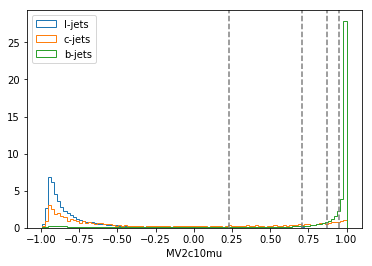

b-jets passing the 60.000000% WP: 0.617946331129
b-jets passing the 70.000000% WP: 0.739848815561
b-jets passing the 77.000000% WP: 0.81089908198
b-jets passing the 85.000000% WP: 0.879309237979


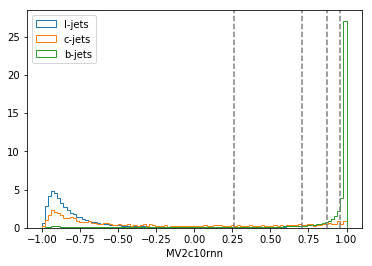

b-jets passing the 60.000000% WP: 0.678492328433
b-jets passing the 70.000000% WP: 0.776064068819
b-jets passing the 77.000000% WP: 0.83710759453
b-jets passing the 85.000000% WP: 0.900670860885


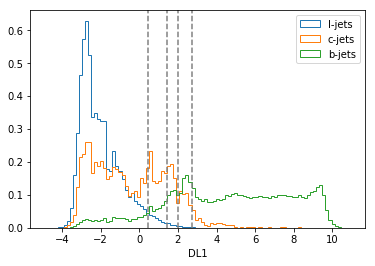

b-jets passing the 60.000000% WP: 0.679928741093
b-jets passing the 70.000000% WP: 0.777548629389
b-jets passing the 77.000000% WP: 0.838560056494
b-jets passing the 85.000000% WP: 0.900454195288


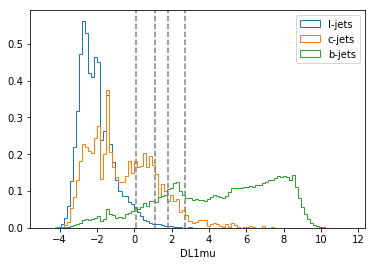

b-jets passing the 60.000000% WP: 0.678171342364
b-jets passing the 70.000000% WP: 0.776593695834
b-jets passing the 77.000000% WP: 0.83724401361
b-jets passing the 85.000000% WP: 0.899427039866


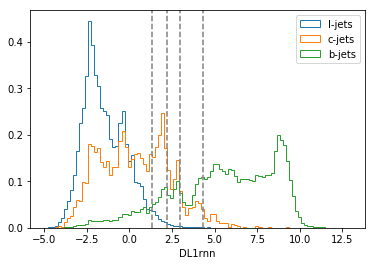

In [107]:
nBins = 100

jet_flav = flatten(df['resolvedJets_HadronConeExclTruthLabelID'])

# I want to print out the signal efficiencies and rejections 
# automatically using a dataframe
WPs = [60,70,77,85]
cols = ['b eff','c rej','l rej']
dfs = {}

for alg in ['MV2c10', 'MV2c10mu', 'MV2c10rnn', 'DL1', 'DL1mu', 'DL1rnn']:
    
    disc = flatten(df['resolvedJets_'+alg])
    myRange = (np.min(disc), np.max(disc))
    
    for pdg, flav in zip([0,4,5],['l','c','b']):
        plt.hist(disc[jet_flav==pdg], bins=nBins, range=myRange, 
                 histtype='step',label='{}-jets'.format(flav), normed=True)
        
    plt.xlabel(alg)
    
    # Overlay the discriminant cut values for the various WPs.
    cuts = Db_cuts[alg]
    
    # Get the min and max of the yaxis 
    ymin, ymax = plt.ylim()
    
    dfs[alg] = pd.DataFrame(np.zeros((4,3)), index=WPs,columns=cols)
    
    for WP in WPs:
        
        val = cuts[WP]

        # For each WP, check how many b-jets this selection keeps
        sig_eff = np.sum(disc[jet_flav==5] > val) / disc[jet_flav==5].size
        dfs[alg].loc[WP,'b eff'] = sig_eff
        
        for pdg, flav in zip([0,4],['l','c']):
            rej = disc[jet_flav==pdg].size / np.sum(disc[jet_flav==pdg] > val)
            dfs[alg].loc[WP,'{} rej'.format(flav)] = rej
    
        print('b-jets passing the {:3f}% WP: {}'.format(WP,sig_eff))
    
        plt.plot([val,val],[ymin,ymax],'gray',linestyle='--')
    
    
    plt.legend()
    plt.ylim(ymin,ymax)
    plt.savefig('figures/{}_disc.pdf'.format(alg))
    plt.show()
    


Conclusions: 

1. For MV2c10 (and variants), these discriminants look super intuitive to me, separating b from c + l!
    - There's always a *higher* efficiency than expected for the b jets! (I wonder why this might be the case??)

2. For the DL1 other distributions, they look a little bit more chaotic, but I guess it's really not the discriminant distribution that's the end of the story here.

But to compare the performance, I think I should really be looking at the background rejections as well!! (I can do it here to gain some intuition, but ultimately needs to be done n the background, i.e, the QCD estimated background.)

- Also, would be a good idea to automatically fill tables to avoid cut and copy errors! (Like with MultiIndex df!)

In [80]:
dfs['MV2c10'].round(2)

b eff  c rej    l rej
60   0.67  20.67  1080.57
70   0.79   8.40   233.51
77   0.84   4.91    91.39
85   0.90   2.74    22.86

In [75]:
dfs['MV2c10mu'].round(2)

b eff      c rej        l rej
60  0.659241  22.186667  1252.477273
70  0.759702   9.759531   362.559211
77  0.826186   5.537438   126.687356
85  0.888578   3.039269    31.799769

In [76]:
dfs['MV2c10rnn'].round(2)

b eff      c rej        l rej
60  0.617946  36.571429  2119.576923
70  0.739849  12.145985   519.896226
77  0.810899   6.656000   166.492447
85  0.879309   3.582347    39.934058

In [77]:
dfs['DL1'].round(2)

b eff      c rej        l rej
60  0.678492  26.204724  1039.792453
70  0.776064   9.563218   293.132979
77  0.837108   5.104294   111.782961
85  0.900671   2.777963    27.362959

In [78]:
dfs['DL1mu'].round(2)

b eff      c rej        l rej
60  0.679929  25.798450  1281.604651
70  0.777549   9.993994   374.891156
77  0.838560   5.593277   123.562780
85  0.900454   2.829932    31.726540

In [81]:
dfs['DL1rnn'].round(2)

b eff  c rej    l rej
60   0.68  31.70  1059.79
70   0.78  10.47   336.03
77   0.84   5.56   142.03
85   0.90   2.84    37.54

Ok, so I think tables are a fine way to show this information, but maybe I should make some plots to show this more suscinctly to see which algorithms are dominant?

- I think the colors should correspond to the same algorithms
- And then the symbols will correspond to the variants trained with the same inputs!


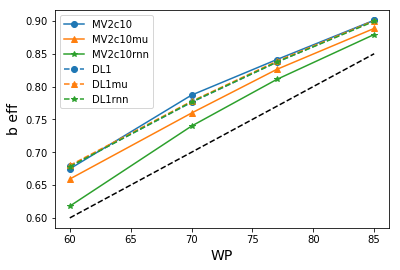

In [108]:
# b: signal efficiency
# I'm just including this for completeness, I don't really think it's a 
# plot that will give me a lot of info

for alg, l in zip(['MV2c10','DL1'],['-','--']):

    for variant, c, m in zip(['','mu','rnn'],['C0','C1','C2'],['o','^','*']):
        
        key = alg+variant

        plt.plot(WPs,dfs[key]['b eff'],label=key,
                     color=c,linestyle=l,marker=m)
        
        

plt.xlabel('WP', fontsize=14)
plt.ylabel('b eff', fontsize=14)
plt.legend()

plt.plot(WPs,[WP*.01 for WP in WPs],'k--')

plt.savefig('figures/beff.pdf')
plt.show()


Ok, so these values are *always* higher than the cuts, and I don't think I was expecting this?

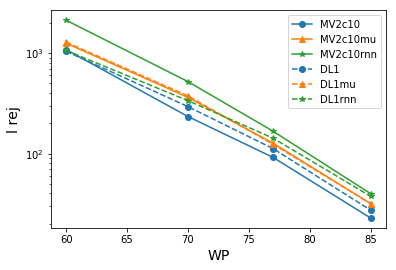

In [109]:
# l-rej

for alg, l in zip(['MV2c10','DL1'],['-','--']):

    for variant, c, m in zip(['','mu','rnn'],['C0','C1','C2'],['o','^','*']):
        
        key = alg+variant

        plt.semilogy(WPs,dfs[key]['l rej'],label=key,
                     color=c,linestyle=l,marker=m)
        
plt.xlabel('WP', fontsize=14)
plt.ylabel('l rej', fontsize=14)
plt.legend()
plt.savefig('figures/lrej.pdf')
plt.show()

- For the standard input, DL1 wins
- There's no difference between the taggers for the mu variant
- With the rnn included, BDT wins

*Does this make sense?*

The only reason why I might say yes is because the DL1 discriminant just looked so wacky!

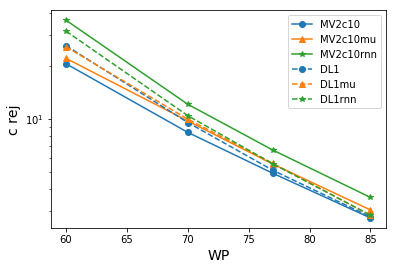

In [110]:
# c-rej

for alg, l in zip(['MV2c10','DL1'],['-','--']):

    for variant, c, m in zip(['','mu','rnn'],['C0','C1','C2'],['o','^','*']):
        
        key = alg+variant

        plt.semilogy(WPs,dfs[key]['c rej'],label=key,
                     color=c,linestyle=l,marker=m)
        
plt.xlabel('WP', fontsize=14)
plt.ylabel('c rej', fontsize=14)
plt.legend()
plt.savefig('figures/crej.pdf')
plt.show()


It's the *exact* same story in terms of the c-rej, so at least our results are consistent in terms of these two backgrounds.

I don't think this is complicated, I'm just not sure that I understand what's going on?